In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore') #Ignoring all the warnings
data = pd.read_csv("netflix_titles.csv")
print(data.shape)
data = data.drop(['show_id', 'title', 'director', 'cast', 'description','date_added', 'listed_in'], axis=1) #Removing unrelated features
print(data.shape)

(8807, 12)
(8807, 5)


In [3]:
data = data.fillna({'country': 'Unknown', 'rating': 'Unknown', 'duration': '0 min'})
def duration_manipulation(val):
    if "Season" in val:
        return int(val.split()[0]) * 120
    elif "min" in val:
        return int(val.split()[0])
    else:
        return 0
data['duration_mins'] = data['duration'].apply(duration_manipulation)
data.drop('duration', axis=1, inplace=True)

In [4]:
le_type = LabelEncoder()
le_country = LabelEncoder()
le_rating =LabelEncoder()
data['type'] =le_type.fit_transform(data['type'])
data['country']= le_country.fit_transform(data['country'])
data['rating']= le_rating.fit_transform(data['rating'])

In [5]:
 #Separating targetfeaturefromdataset
X =data.drop('rating',axis=1)
Y =data['rating']

In [6]:
X_train,X_test, Y_train,Y_test= train_test_split(X,Y,test_size=0.2, random_state=42)
scaler =StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [7]:
knn= KNeighborsClassifier(n_neighbors=16,metric='manhattan',algorithm='brute')
knn.fit(X_train,Y_train)#Fittingdataintomodel
Y_pred =knn.predict(X_test)

In [8]:
print("KNNClassificationon'rating'")
print("Accuracy:",accuracy_score(Y_test,Y_pred))
print("Classification Report:\n",classification_report(Y_test,Y_pred))

KNNClassificationon'rating'
Accuracy: 0.4585698070374574
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           3       0.00      0.00      0.00        12
           5       0.00      0.00      0.00        16
           6       0.40      0.16      0.23        62
           7       0.31      0.29      0.30        87
           8       0.38      0.37      0.37       163
           9       0.43      0.54      0.48       414
          10       0.00      0.00      0.00        43
          11       0.52      0.71      0.60       662
          12       0.32      0.05      0.09       185
          13       0.43      0.12      0.18        52
          14       0.30      0.11      0.16        65

    accuracy                           0.46      1762
   macro avg       0.26      0.19      0.20      1762
weighted avg       0.42      0.46      0.41      1762



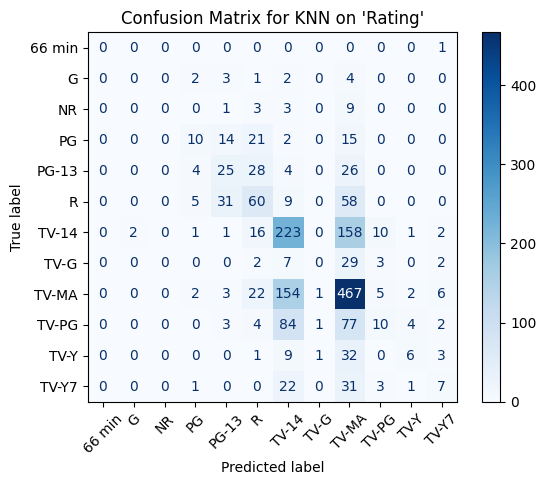

In [9]:
cm = confusion_matrix(Y_test, Y_pred)
unique_labels = np.unique(Y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_rating.inverse_transform(unique_labels))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix for KNN on 'Rating'")
plt.show()